In [16]:
import requests
import matplotlib.pyplot as pt
import cartopy.crs as cr
import time
from IPython.display import display

In [17]:
def fetch_iss_position(url, duration=3600, interval=5):
    latitudes = []
    longitudes = []
    start_time = time.time()
    while time.time() - start_time < duration:
        response = requests.get(url)
        data = response.json()
        latitudes.append(float(data["iss_position"]["latitude"]))
        longitudes.append(float(data["iss_position"]["longitude"]))
        time.sleep(interval)
    return latitudes, longitudes

In [18]:
def plot_iss_position(latitudes, longitudes):
    pt.figure(figsize=(10, 10))
    ax = pt.axes(projection=cr.PlateCarree())
    ax.set_global()
    ax.stock_img()
    ax.plot(longitudes, latitudes, 'r-', transform=cr.Geodetic())
    pt.show()

In [19]:
url = "http://api.open-notify.org/iss-now.json"
latitudes, longitudes = fetch_iss_position(url)

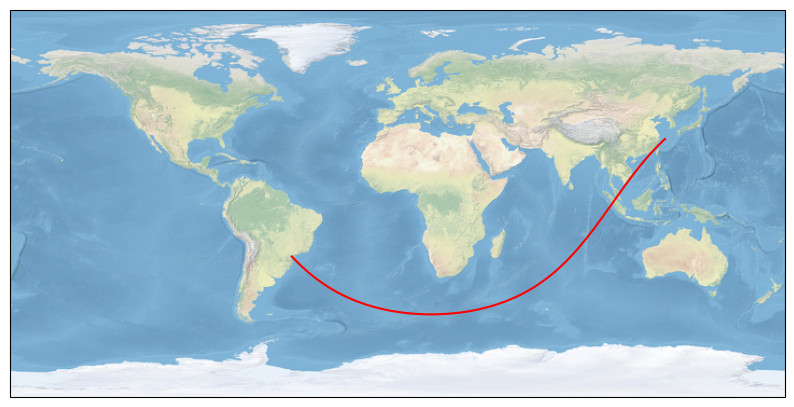

In [20]:
plot_iss_position(latitudes, longitudes)